# **Soyabean Volumes**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving Soyabean_Volumes_Aggregated.xlsx to Soyabean_Volumes_Aggregated.xlsx


In [4]:
# Load the data
data = pd.read_excel('Soyabean_Volumes_Aggregated.xlsx')
prices = data['Soyabean_Vols'].values.reshape(-1, 1)

In [5]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

In [6]:
# Split the data into training and testing sets
train_size = int(len(prices_scaled) * 0.8)
test_size = len(prices_scaled) - train_size
train_prices = prices_scaled[0:train_size,:]
test_prices = prices_scaled[train_size:len(prices_scaled),:]

In [7]:
# Create the input and output sequences
def create_sequences(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
look_back = 5
trainX, trainY = create_sequences(train_prices, look_back)
testX, testY = create_sequences(test_prices, look_back)


In [9]:
# Reshape the input sequences
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [10]:
# Define the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Train the model
model.fit(trainX, trainY, epochs=100, batch_size=32)


Epoch 1/100
3/3 [==============================] - 9s 15ms/step - loss: 0.1275
Epoch 2/100
3/3 [==============================] - 0s 12ms/step - loss: 0.1058
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0896
Epoch 4/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0710
Epoch 5/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0639
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0658
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0640
Epoch 8/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0606
Epoch 9/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0575
Epoch 10/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0584
Epoch 11/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0580
Epoch 12/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0578
Epoch 13/100
3/3 [==============================]

In [13]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

1/1 [==============================] - 0s 23ms/step


In [14]:
# Invert the predictions to their original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [15]:
# Calculate the root mean squared error (RMSE)
trainScore = np.sqrt(np.mean(np.power(trainY - trainPredict, 2)))
testScore = np.sqrt(np.mean(np.power(testY - testPredict, 2)))
print('Train RMSE: {:.2f}'.format(trainScore))
print('Test RMSE: {:.2f}'.format(testScore))

Train RMSE: 432605.19
Test RMSE: 412043.88


In [17]:
train_rmse = 432605.19
test_rmse = 412043.88

overall_rmse = np.sqrt((train_rmse**2 + test_rmse**2)/2)

print('Overall RMSE:', overall_rmse)

Overall RMSE: 422449.6475678436


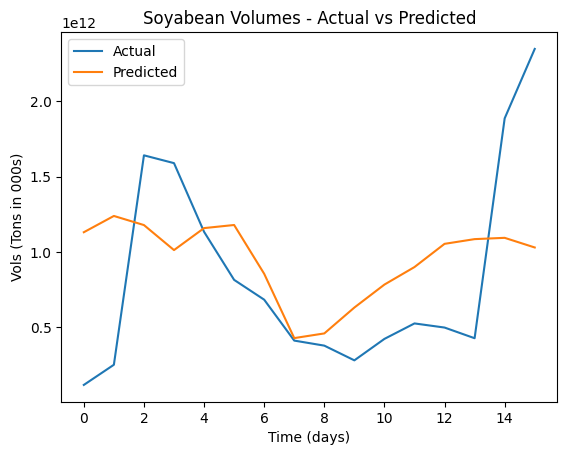

In [18]:
# Plot the actual vs predicted wheat prices for the testing data
plt.plot(scaler.inverse_transform(testY.reshape(-1, 1)), label='Actual')
plt.plot(scaler.inverse_transform(testPredict), label='Predicted')
plt.title('Soyabean Volumes - Actual vs Predicted')
plt.xlabel('Time (days)')
plt.ylabel('Vols (Tons in 000s)')
plt.legend()
plt.show()